In [117]:
import pandas as pd

df = pd.read_csv("datasets/diabetes_two_1_1.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              519 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            519 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [119]:
df.isnull().sum()

Age                   1
Gender                1
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              1
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [120]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Gender"].fillna(df["Gender"].mode().iloc[0], inplace=True)
df["weakness"].fillna(df["weakness"].mode().iloc[0], inplace=True)

In [121]:
z_score = (df["Age"] - df["Age"].mean())/df["Age"].std()

index = -1
for i in z_score:
    if i < -3 or i > 3:
        index = z_score.index[z_score == i][0]
        print("you have outlier at ", index)

you have outlier at  4


In [122]:
df["Age"][index] = df["Age"].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_26100\1695737920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][index] = df["Age"].mean()


In [123]:
for col in df.select_dtypes(include=["object"]).columns:
    print(df.groupby([col]).size().reset_index(name="count"))

   Gender  count
0  Female    192
1    Male    328
  Polyuria  count
0       No    262
1      Yes    258
  Polydipsia  count
0         No    287
1        Yes    233
  sudden weight loss  count
0                 No    303
1                Yes    217
  weakness  count
0       No    215
1      Yes    305
  Polyphagia  count
0         No    283
1        Yes    237
  Genital thrush  count
0             No    404
1            Yes    116
  visual blurring  count
0              No    287
1             Yes    233
  Itching  count
0      No    267
1     Yes    253
  Irritability  count
0           No    394
1          Yes    126
  delayed healing  count
0              No    281
1             Yes    239
  partial paresis  count
0              No    296
1             Yes    224
  muscle stiffness  count
0               No    325
1              Yes    195
  Alopecia  count
0       No    341
1      Yes    179
  Obesity  count
0      No    432
1     Yes     88
      class  count
0  Negative    200
1 

In [124]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [125]:
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    int32  
 2   Polyuria            520 non-null    int32  
 3   Polydipsia          520 non-null    int32  
 4   sudden weight loss  520 non-null    int32  
 5   weakness            520 non-null    int32  
 6   Polyphagia          520 non-null    int32  
 7   Genital thrush      520 non-null    int32  
 8   visual blurring     520 non-null    int32  
 9   Itching             520 non-null    int32  
 10  Irritability        520 non-null    int32  
 11  delayed healing     520 non-null    int32  
 12  partial paresis     520 non-null    int32  
 13  muscle stiffness    520 non-null    int32  
 14  Alopecia            520 non-null    int32  
 15  Obesity             520 non-null    int32  
 16  class   

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

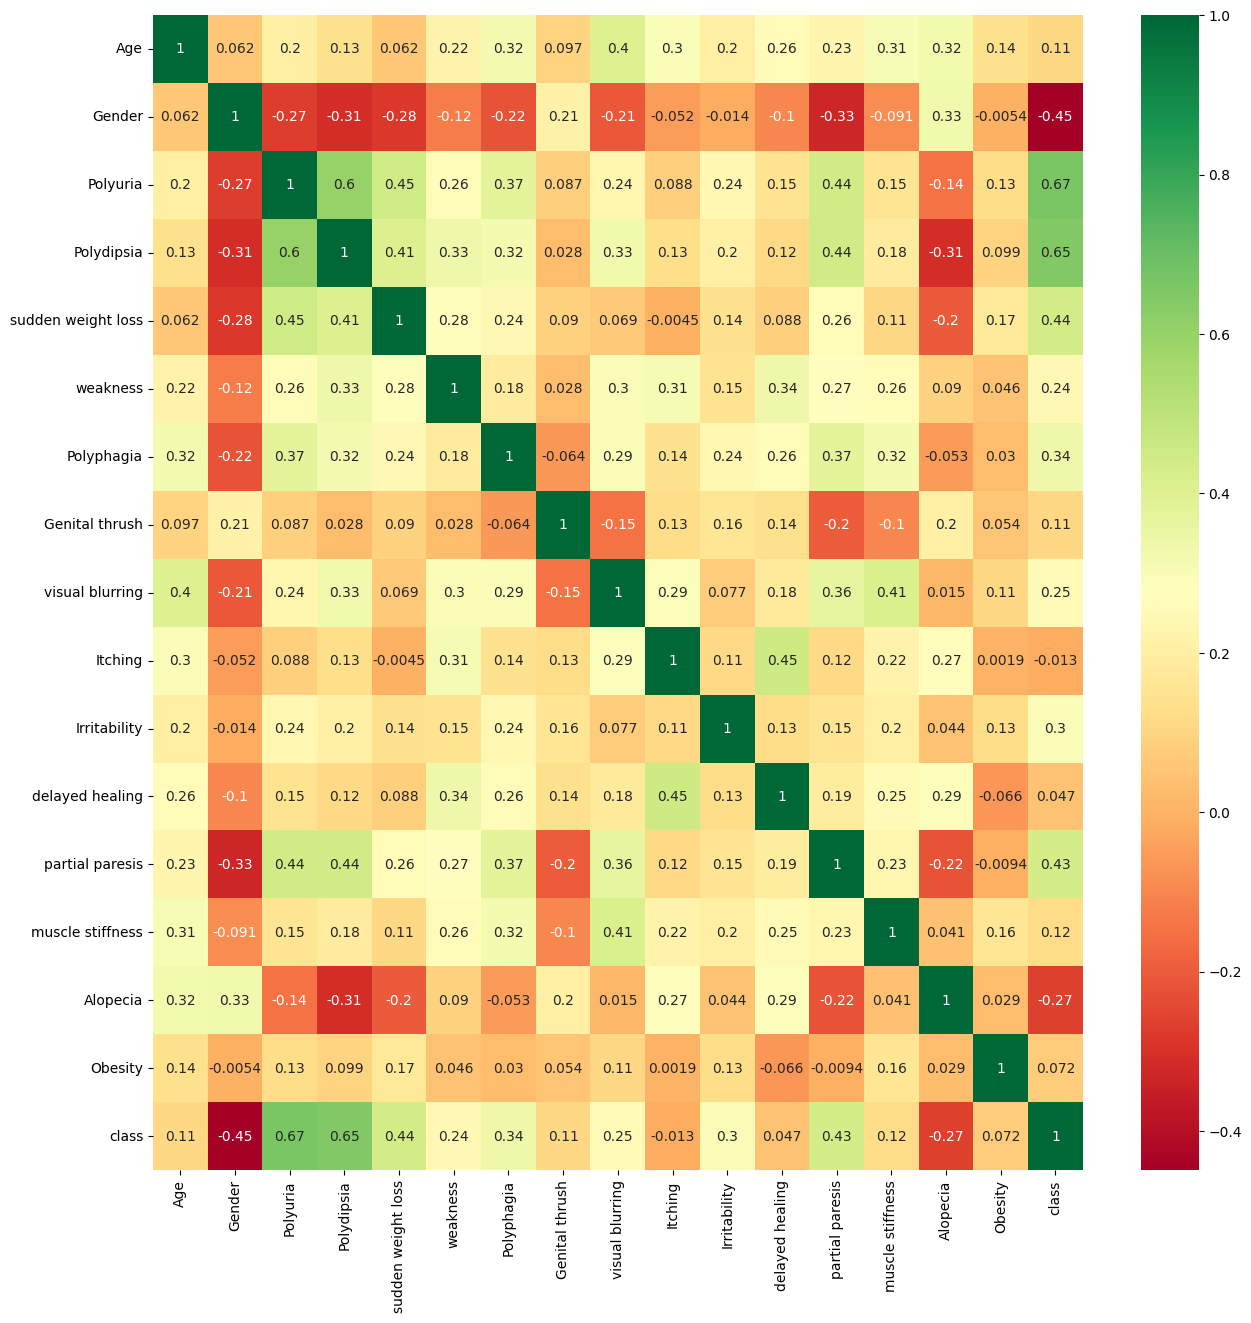

In [128]:
plt.subplots(figsize=(15, 15))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap="RdYlGn", annot_kws={"size": 10})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [129]:
correlations = df.corr(method="pearson")
correlations["class"].sort_values(ascending=False)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108324
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233
Name: class, dtype: float64

In [130]:
from sklearn.utils import shuffle

shuffled_df = shuffle(df)

In [131]:
rearranged_df = shuffled_df.reset_index(drop=True)
rearranged_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,48.0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1
1,58.0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1
2,66.0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1
3,66.0,1,1,1,0,1,0,1,0,1,1,1,1,0,0,0,1
4,44.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,56.0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1
516,48.0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1
517,45.0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1
518,48.0,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1


In [132]:
X = rearranged_df.drop(columns=["class"])
y = rearranged_df["class"]

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler = MinMaxScaler()
MinMax_scaled_df = scaler.fit_transform(X)
MinMax_scaled_df

array([[0.43243243, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56756757, 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.67567568, 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.39189189, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43243243, 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.71621622, 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print("train data size (features): ", len(X_train))
print("train data size (target): ", len(y_train))

print("test data size (features): ", len(X_test))
print("test data size (target): ", len(y_test))

train data size (features):  416
train data size (target):  416
test data size (features):  104
test data size (target):  104


In [137]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=11, weights="uniform", algorithm="auto", leaf_size=30, metric="minkowski", p=2)

In [138]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [139]:
y_pred = model.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [141]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred)

print("accuracy = ", accuracy)
print("precision = ", precision)
print("recall = ", recall)
print("f1 = ", f1)
print("AUC = ", AUC)

accuracy =  0.7884615384615384
precision =  0.8867924528301887
recall =  0.746031746031746
f1 =  0.8103448275862069
AUC =  0.7998451413085559


In [142]:
roc_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold2 = roc_curve(y_test, roc_score)

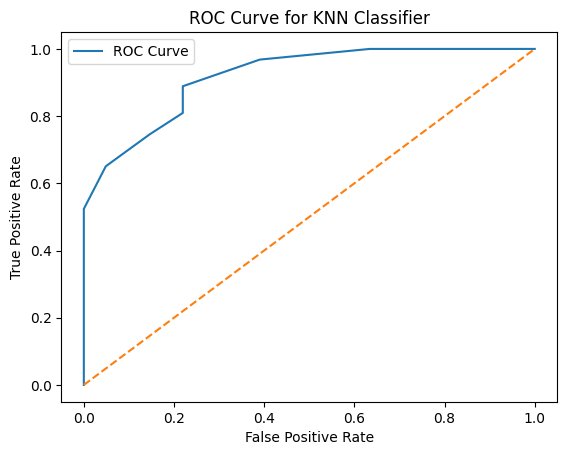

In [143]:
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], ls="--")

plt.title("ROC Curve for KNN Classifier")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.legend()

plt.show()

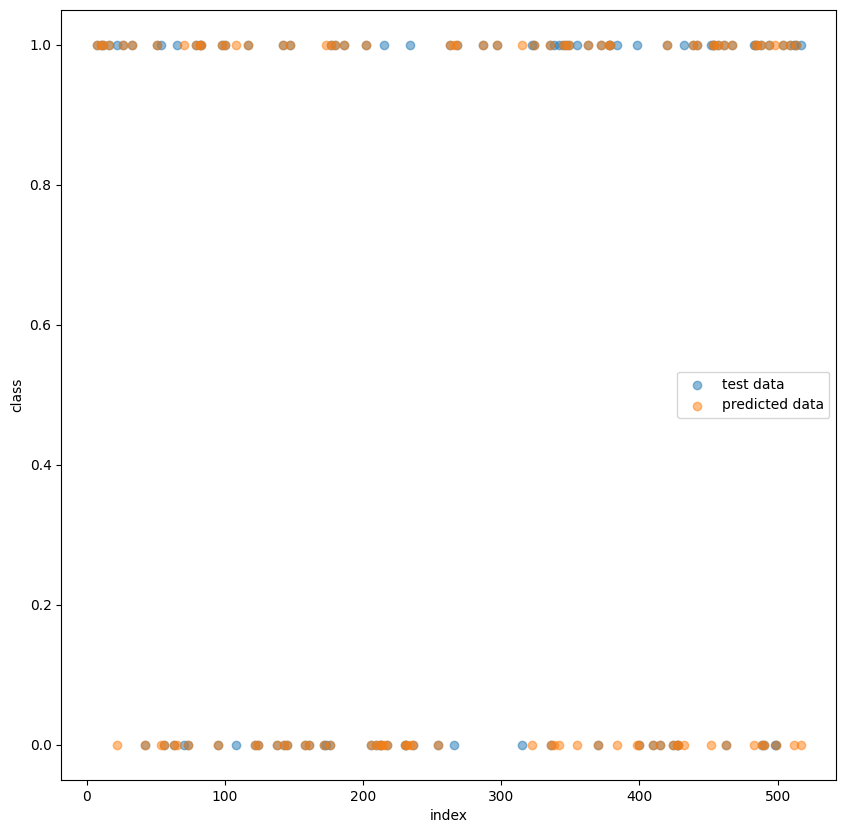

In [144]:
plt.subplots(figsize=(10,10))
plt.scatter(y_test.index, y_test, label="test data", alpha=0.5)
plt.scatter(y_test.index, y_pred, label="predicted data", alpha=0.5)

plt.ylabel("class")
plt.xlabel("index")

plt.legend()

plt.show()